In [1]:
#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt

# Import ESG Data from CSV

In [2]:
# # Import the CSV
# file_to_load = os.path.join("Resources", "latest_esg_details.csv")
# Stocks_with_ESG = pd.read_csv(file_to_load)
# Stocks_with_ESG
                            

In [3]:
%run Connect_Database.ipynb

Enter database password········
('INTC', 17.0, 4.0, 6.0, 7.0, datetime.datetime(2022, 2, 1, 0, 0), 'LAG_PERF', 'Semiconductors', 3.0, 31, 14.57, 'Customer Incidents,Business Ethics Incidents', 11.6, 21.21967741935484, 32.93, 2.53, 8.044999999999998, 16.08, 2.62, 6.166333333333333, 9.51, 4.79, 6.668666666666666, 9.67, 0.0, 1.1290322580645162, 4.0, 'None')


In [4]:
# To show the table
Stocks_with_ESG=esg_info_df

In [5]:
Stocks_with_ESG

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,22.151,0.08586,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224
1,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,21.335,0.15249,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384
2,BAC,27.0,2.0,14.0,11.0,2022-02-01,Not Available,Banks,3.0,175,...,30.374,0.01068,0.11778,55160016,19239484,43.0200,36.51,50.11,43.0200,346950303744
3,AAPL,16.3,0.6,6.9,8.8,2022-02-01,UNDER_PERF,Technology Hardware,3.0,55,...,4.402,0.19875,1.45567,93700745,51356493,174.2850,118.86,182.94,174.2900,2844308013056
4,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,10.619,0.17199,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,DLR,13.0,3.2,3.7,6.1,2022-02-01,UNDER_PERF,Real Estate,0.0,108,...,58.279,0.01308,0.09442,1634014,819189,138.2300,130.10,178.22,138.2300,39227875328
61,COF,23.2,0.1,13.5,9.7,2022-02-01,AVG_PERF,Diversified Financials,4.0,89,...,133.911,0.02959,0.20556,3024740,2240666,135.8800,122.43,177.95,135.8800,57833521152
62,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,17.547,0.10162,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680
63,KMB,22.2,8.1,7.8,6.4,2022-02-01,AVG_PERF,Household Products,2.0,28,...,1.526,0.10050,2.29639,2023524,1778481,120.2800,117.32,145.79,120.2800,40525701120


# Stock Price Analysis

### Stocc Price = Valuation + Investor Confidences


Many factors can influence investor confidence, and ESG is most and one of the biggest reasons to influence the investor's confidence. In this model, we assume the ESG score is the only reason to affect investor confidence. Then, I will use three methods to get the valuation: Price to Sale and price to earnings (comparable industry methods) and Discounted Dividend Method.


Then, MV Price - valuation = Investor Confidence


In the end, we will find the suitest one to test and train.

## P/E  and P/S valution 

In [7]:
# Import the CSV
df =esg_info_df
df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,22.151,0.08586,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224
1,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,21.335,0.15249,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384
2,BAC,27.0,2.0,14.0,11.0,2022-02-01,Not Available,Banks,3.0,175,...,30.374,0.01068,0.11778,55160016,19239484,43.0200,36.51,50.11,43.0200,346950303744
3,AAPL,16.3,0.6,6.9,8.8,2022-02-01,UNDER_PERF,Technology Hardware,3.0,55,...,4.402,0.19875,1.45567,93700745,51356493,174.2850,118.86,182.94,174.2900,2844308013056
4,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,10.619,0.17199,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,DLR,13.0,3.2,3.7,6.1,2022-02-01,UNDER_PERF,Real Estate,0.0,108,...,58.279,0.01308,0.09442,1634014,819189,138.2300,130.10,178.22,138.2300,39227875328
61,COF,23.2,0.1,13.5,9.7,2022-02-01,AVG_PERF,Diversified Financials,4.0,89,...,133.911,0.02959,0.20556,3024740,2240666,135.8800,122.43,177.95,135.8800,57833521152
62,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,17.547,0.10162,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680
63,KMB,22.2,8.1,7.8,6.4,2022-02-01,AVG_PERF,Household Products,2.0,28,...,1.526,0.10050,2.29639,2023524,1778481,120.2800,117.32,145.79,120.2800,40525701120


In [8]:
# Get average P/S dataframe
average_df=df.groupby('industry').mean()
ps_average_df=average_df.filter(['priceToSalesTrailing12Months','industry'], axis=1)
ps_average_df

,priceToSalesTrailing12Months
industry,
Aerospace & Defense,1.943653
Automobiles,0.482746
Banks,2.875553
Building Products,1.136477
Chemicals,2.792942
Commercial Services,2.267757
Diversified Financials,4.632819
Food Products,2.684802
Healthcare,2.357364


In [9]:
# Get average P/E dataframe
average_df=df.groupby('industry').mean()
pe_average_df=average_df.filter(['trailingPE','industry'], axis=1)
pe_average_df

,trailingPE
industry,
Aerospace & Defense,18.529438
Automobiles,23.099579
Banks,9.544439
Building Products,9.939586
Chemicals,37.557640
Commercial Services,8.234231
Diversified Financials,16.652937
Food Products,24.509838
Healthcare,26.381974


In [10]:
#Merge the industried average to CSV
stock_df = pd.merge(df, ps_average_df,on='industry',suffixes=['','_In_Average'])
stock_df = pd.merge(stock_df, pe_average_df,on='industry',suffixes=['','_In_Average'])
stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,priceToSalesTrailing12Months_In_Average,trailingPE_In_Average
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224,9.622602,30.860748
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160,9.622602,30.860748
2,AMAT,12.0,4.0,3.0,5.0,2022-02-01,LAG_PERF,Semiconductors,1.0,31,...,0.51593,8465944,6073416,137.0600,114.39,167.06,137.0600,121779593216,9.622602,30.860748
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,10812259,7203782,157.9700,122.17,193.58,157.9700,176926408704,9.622602,30.860748
4,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384,8.626790,33.055841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LOW,11.7,3.7,4.6,3.3,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,6.57829,3853954,6832850,212.9200,182.08,263.31,212.9200,143454208000,0.974595,13.939356
61,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680,0.974595,13.939356
62,NLSN,23.0,0.1,16.9,6.0,2022-02-01,AVG_PERF,Commercial Services,1.0,32,...,0.19481,6149372,1867500,22.0101,16.02,28.42,22.0101,7937150464,2.267757,8.234231
63,ECL,24.1,9.5,8.4,6.2,2022-02-01,AVG_PERF,Chemicals,2.0,77,...,0.17579,1623990,1475869,177.5900,154.85,238.93,177.5900,50891431936,2.792942,37.557640


In [11]:
# rename columns of the P/E and P/S name 
stock_df = stock_df.rename(columns={'priceToSalesTrailing12Months_In_Average': 'P/S_in_Average', 'trailingPE_In_Average': 'P/E_in_Average','currentPrice':'Mv Price',
                                   'priceToSalesTrailing12Months': 'P/S', 'trailingPE': 'P/E'})



stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,Mv Price,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,P/S_in_Average,P/E_in_Average
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224,9.622602,30.860748
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160,9.622602,30.860748
2,AMAT,12.0,4.0,3.0,5.0,2022-02-01,LAG_PERF,Semiconductors,1.0,31,...,0.51593,8465944,6073416,137.0600,114.39,167.06,137.0600,121779593216,9.622602,30.860748
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,10812259,7203782,157.9700,122.17,193.58,157.9700,176926408704,9.622602,30.860748
4,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384,8.626790,33.055841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LOW,11.7,3.7,4.6,3.3,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,6.57829,3853954,6832850,212.9200,182.08,263.31,212.9200,143454208000,0.974595,13.939356
61,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680,0.974595,13.939356
62,NLSN,23.0,0.1,16.9,6.0,2022-02-01,AVG_PERF,Commercial Services,1.0,32,...,0.19481,6149372,1867500,22.0101,16.02,28.42,22.0101,7937150464,2.267757,8.234231
63,ECL,24.1,9.5,8.4,6.2,2022-02-01,AVG_PERF,Chemicals,2.0,77,...,0.17579,1623990,1475869,177.5900,154.85,238.93,177.5900,50891431936,2.792942,37.557640


In [12]:
# filter the columns that we need 
No1_stock_df=stock_df.filter(['Ticker','longName','P/E_in_Average','P/S_in_Average','industry','P/E','P/S', 'Mv Price'], axis=1)
No1_stock_df.head(10)

,Ticker,longName,P/E_in_Average,P/S_in_Average,industry,P/E,P/S,Mv Price
0,INTC,Intel Corporation,30.860748,9.622602,Semiconductors,10.048469,2.667451,51.8300
1,NVDA,NVIDIA Corporation,30.860748,9.622602,Semiconductors,71.906470,25.632942,276.8399
2,AMAT,"Applied Materials, Inc.",30.860748,9.622602,Semiconductors,21.415625,5.280302,137.0600
3,QCOM,QUALCOMM Incorporated,30.860748,9.622602,Semiconductors,20.072428,4.909712,157.9700
4,MSFT,Microsoft Corporation,33.055841,8.626790,Software & Services,32.718860,12.472495,307.1974
5,MA,Mastercard Incorporated,33.055841,8.626790,Software & Services,42.929886,18.159925,349.0200
6,ACN,Accenture plc,33.055841,8.626790,Software & Services,34.090294,3.857342,327.7100
7,IBM,International Business Machines Corporation,33.055841,8.626790,Software & Services,24.862768,1.581118,131.3500
8,INTU,Intuit Inc.,33.055841,8.626790,Software & Services,60.592274,12.607615,459.3500
9,EBAY,eBay Inc.,33.055841,8.626790,Software & Services,3.140966,3.082246,57.4200


## P/E Branch Analysis

In [13]:
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/E_in_Average']-No1_stock_df['P/E'])/No1_stock_df['P/E']


In [14]:

# Use the P/E valuation to get the stock price
PE_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/E_in_Average']
PE_valuation_Stock_Price.head(10)

0     94.779191
1     13.244785
2     44.471537
3     47.447462
4     33.396293
5     25.452866
6     32.052779
7     43.948793
8     18.033465
9    347.882991
dtype: float64

In [15]:
# Get Difference bewteen MV Price
Diff_PE=stock_df['Mv Price']-PE_valuation_Stock_Price
Diff_PE.head(10)

0    -42.949191
1    263.595115
2     92.588463
3    110.522538
4    273.801107
5    323.567134
6    295.657221
7     87.401207
8    441.316535
9   -290.462991
dtype: float64

In [16]:
# Create Dataframe for P/E valuation, Market value price and difference
pe_df=pd.DataFrame({"Predicted Price": PE_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PE,"ESG":Stocks_with_ESG["totalScore"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
pe_df.head(10)


,Predicted Price,Mv Price,Difference,ESG
0,94.779191,51.8300,-42.949191,17.0
1,13.244785,276.8399,263.595115,13.0
2,44.471537,137.0600,92.588463,27.0
3,47.447462,157.9700,110.522538,16.3
4,33.396293,307.1974,273.801107,12.8
5,25.452866,349.0200,323.567134,16.7
6,32.052779,327.7100,295.657221,11.8
7,43.948793,131.3500,87.401207,24.4
8,18.033465,459.3500,441.316535,16.0
9,347.882991,57.4200,-290.462991,17.2


In [17]:
# Delete the nan and inf value
pe_df=pe_df.replace([np.inf, -np.inf], np.nan)
pe_df=pe_df.dropna()
pe_df

,Predicted Price,Mv Price,Difference,ESG
0,94.779191,51.8300,-42.949191,17.0
1,13.244785,276.8399,263.595115,13.0
2,44.471537,137.0600,92.588463,27.0
3,47.447462,157.9700,110.522538,16.3
4,33.396293,307.1974,273.801107,12.8
...,...,...,...,...
60,10.464506,212.9200,202.455494,13.0
61,20.869191,96.3000,75.430809,23.2
62,8.234231,22.0101,13.775869,14.3
63,31.064612,177.5900,146.525388,22.2


In [18]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
X =pe_df['ESG'].values.reshape(-1, 1)
y = pe_df['Difference'].values.reshape(-1, 1)

In [19]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# fit the model
model.fit(X,y)
print(model)

LinearRegression()


In [21]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-1.93557823]]
y-axis intercept:  [174.73653667]


In [22]:
y_pred = model.predict(X)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(65, 1)


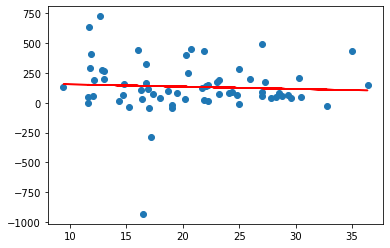

In [23]:
# Plot the Graph of Liner Regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

## P/S Branch Analysis

In [24]:
# Use P/S to compare the average

# Get % rate difference between P/S of stock and P/S of industry
PS_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']

In [25]:

# Use the P/E valuation to get the stock price
PS_valuation_Stock_Price=(1+PS_rate)*No1_stock_df['P/S_in_Average']
PS_valuation_Stock_Price

0     34.712714
1      3.612323
2     17.535829
3     18.859448
4      5.966850
        ...    
60     0.630481
61     2.145716
62     2.267757
63     1.905826
64     5.225105
Length: 65, dtype: float64

In [26]:
# Get Difference bewteen MV Price
Diff_PS=stock_df['Mv Price']-PS_valuation_Stock_Price
Diff_PS

0      17.117286
1     273.227577
2     119.524171
3     139.110552
4     301.230550
         ...    
60    212.289519
61     94.154284
62     19.742343
63    175.684174
64    105.464895
Length: 65, dtype: float64

In [27]:
# Create Dataframe for P/S valuation, Market value price and difference
ps_df=pd.DataFrame({"Predicted Price": PS_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PS,"ESG":Stocks_with_ESG["totalScore"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
ps_df.head(10)

,Predicted Price,Mv Price,Difference,ESG
0,34.712714,51.8300,17.117286,17.0
1,3.612323,276.8399,273.227577,13.0
2,17.535829,137.0600,119.524171,27.0
3,18.859448,157.9700,139.110552,16.3
4,5.966850,307.1974,301.230550,12.8
5,4.098118,349.0200,344.921882,16.7
6,19.293468,327.7100,308.416532,11.8
7,47.068912,131.3500,84.281088,24.4
8,5.902901,459.3500,453.447099,16.0
9,24.145223,57.4200,33.274777,17.2


In [28]:
# Delete the nan and inf value
ps_df=ps_df.replace([np.inf, -np.inf], np.nan)
ps_df=ps_df.dropna()
ps_df

,Predicted Price,Mv Price,Difference,ESG
0,34.712714,51.8300,17.117286,17.0
1,3.612323,276.8399,273.227577,13.0
2,17.535829,137.0600,119.524171,27.0
3,18.859448,157.9700,139.110552,16.3
4,5.966850,307.1974,301.230550,12.8
...,...,...,...,...
60,0.630481,212.9200,212.289519,13.0
61,2.145716,96.3000,94.154284,23.2
62,2.267757,22.0101,19.742343,14.3
63,1.905826,177.5900,175.684174,22.2


In [29]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
m =ps_df['ESG'].values.reshape(-1, 1)
n = ps_df['Difference'].values.reshape(-1, 1)

In [30]:
# Create the model
from sklearn.linear_model import LinearRegression
modelmn = LinearRegression()

In [31]:
# fit the model
modelmn.fit(m,n)
print(modelmn)

LinearRegression()


In [32]:
n_pred = modelmn.predict(m)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(65, 1)


In [33]:
print('Weight coefficients: ', modelmn.coef_)
print('y-axis intercept: ', modelmn.intercept_) 

Weight coefficients:  [[-3.66403435]]
y-axis intercept:  [254.32996047]


In [34]:
y_pred = model.predict(X)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(65, 1)


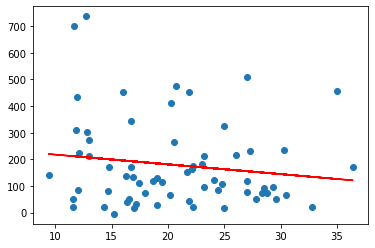

In [35]:
# Plot the Graph of Liner Regression
plt.scatter(m, n)
plt.plot(m, n_pred, color='red')
plt.show()

# Dividend Model

In [36]:
# create the datafram for dividend discount model
div_stock_df=stock_df.filter(['TICKER','longName','beta','industry','dividendRate','revenueGrowth', 'Mv Price'], axis=1)
div_stock_df

,longName,beta,industry,dividendRate,revenueGrowth,Mv Price
0,Intel Corporation,0.535554,Semiconductors,1.46,0.028,51.8300
1,NVIDIA Corporation,1.411417,Semiconductors,0.16,0.528,276.8399
2,"Applied Materials, Inc.",1.379740,Semiconductors,0.96,0.306,137.0600
3,QUALCOMM Incorporated,1.258366,Semiconductors,2.72,0.300,157.9700
4,Microsoft Corporation,0.910925,Software & Services,2.48,0.201,307.1974
...,...,...,...,...,...,...
60,"Lowe's Companies, Inc.",1.294025,Retailing,3.20,0.027,212.9200
61,"Best Buy Co., Inc.",1.587532,Retailing,2.80,0.005,96.3000
62,Nielsen Holdings plc,1.405511,Commercial Services,0.24,0.025,22.0101
63,Ecolab Inc.,1.010643,Chemicals,2.04,0.100,177.5900


In [37]:
# calculate the cost of equity by GPD growth rate 5.7% and Treasury Rate 1.52%

cost_of_equity= div_stock_df['beta']*(0.057-0.0213)+0.0152
cost_of_equity

0     0.034319
1     0.065588
2     0.064457
3     0.060124
4     0.047720
        ...   
60    0.061397
61    0.071875
62    0.065377
63    0.051280
64    0.069909
Name: beta, Length: 65, dtype: float64

In [38]:
div_valuation_Stock_Price=(div_stock_df['Mv Price']*div_stock_df['dividendRate']/100)/(cost_of_equity)
div_de=stock_df['Mv Price']-div_valuation_Stock_Price

In [39]:
div_df=pd.DataFrame({"Predicted Price": div_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": div_de,"ESG":Stocks_with_ESG["totalScore"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
div_df

,Predicted Price,Mv Price,Difference,ESG
0,22.049357,51.8300,29.780643,17.0
1,6.753471,276.8399,270.086429,13.0
2,20.413326,137.0600,116.646674,27.0
3,71.465768,157.9700,86.504232,16.3
4,159.649873,307.1974,147.547527,12.8
...,...,...,...,...
60,110.974056,212.9200,101.945944,13.0
61,37.515187,96.3000,58.784813,23.2
62,0.807997,22.0101,21.202103,14.3
63,70.648190,177.5900,106.941810,22.2


In [40]:
# Delete the nan and inf value
div_df=div_df.replace([np.inf, -np.inf,0], np.nan)
div_df=div_df.dropna()
div_df

,Predicted Price,Mv Price,Difference,ESG
0,22.049357,51.8300,29.780643,17.0
1,6.753471,276.8399,270.086429,13.0
2,20.413326,137.0600,116.646674,27.0
3,71.465768,157.9700,86.504232,16.3
4,159.649873,307.1974,147.547527,12.8
...,...,...,...,...
60,110.974056,212.9200,101.945944,13.0
61,37.515187,96.3000,58.784813,23.2
62,0.807997,22.0101,21.202103,14.3
63,70.648190,177.5900,106.941810,22.2


In [41]:
# Set w,z for Linear Regression
from sklearn.linear_model import LinearRegression
w =div_df['ESG'].values.reshape(-1, 1)
z = div_df['Difference'].values.reshape(-1, 1)

In [42]:
# Create the model
from sklearn.linear_model import LinearRegression
modelwz = LinearRegression()

In [43]:
# fit the model
modelwz.fit(m,n)
print(modelwz)

LinearRegression()


In [44]:
print('Weight coefficients: ', modelwz.coef_)
print('y-axis intercept: ', modelwz.intercept_) 

Weight coefficients:  [[-3.66403435]]
y-axis intercept:  [254.32996047]


In [45]:
z_pred = model.predict(z)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(z_pred.shape)

(65, 1)


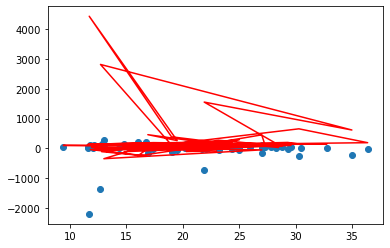

In [46]:
# Plot the Graph of Liner Regression
plt.scatter(w, z)
plt.plot(w, z_pred, color='red')
plt.show()

# Summary




#### Above three methed, P/S is best to test and train to compare other two.

see **PS_Method_Machine_Learning _Model** for test and train